# 1. Import Library

In [ ]:
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats import norm,chisquare
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

# 2. Load Dataset

In [ ]:
## Upload data ke Google Colab
from google.colab import files
uploaded = files.upload()

Saving Data Test.csv to Data Test.csv
Saving Data Train.csv to Data Train.csv


In [ ]:
df = pd.read_csv("Data Train.csv")
df_test = pd.read_csv("Data Test.csv")

## 2.1 Check Data

### Data Train

In [ ]:
## Melihat 5 data teratas dari data train
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
#Melihat informasi mengenai dataset yang digunakan (type, jumlah column, jumlah baris, dll)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

Berdasarkan info diatas kita bisa melihat bahwa :
*   Data terdiri dari 4250 row dan 20 columns
*   Data terdiri dari 3 type data yaitu float64(8), int64(7), object(5)



In [ ]:
# Cek data yang NULL
df.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

Keterangan : Data tidak memiliki nilai NULL

In [ ]:
## Cek data yang duplikat
df.duplicated().sum()

0

## 2.2 Deskripsi Column pada Data
*   state : kode dari US state yang terdiri dari 2 huruf
*   account_length : angka yang menunjukkan lama customer menggunakan provider (dalam bulan)
*   List item
*   List item





In [ ]:
## Detect categorical or Numeric automaticaly (Looping)
## Mengkategorikan data berdasarkan type nya (numerical atau categorical)
# target = []
# categorical = []
# numerical = []

# for col in df.columns:
#     if str(df[col].dtype) == "object":
#         if col == "churn":
#             target.append(col)
#         else:
#             categorical.append(col)
#     else:
#         numerical.append(col)

In [ ]:
### Buat Function untuk automation
def return_categorical_numerical_target_features(df):
  categorical = []
  numerical = []
  target = []
  for col in df.columns:
    if str(df[col].dtype) == "object":
        if col == "churn":
            target.append(col)
        else:
            categorical.append(col)
    else:
        numerical.append(col)

  return categorical, numerical, target
categorical, numerical, target = return_categorical_numerical_target_features(df)
print(categorical)
print(numerical)
print(target)

['state', 'area_code', 'international_plan', 'voice_mail_plan']
['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']
['churn']


In [ ]:
## Melakukan pengamatan dari data numerical
df[numerical].describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Berdasarkan hasil describe dapat dilihat bahwa :
*   column [number_vmail_messages] memiliki perbandingan nilai mean dan median cukup jauh, yang berarti distribusi data ini tidak normal
*   sementara data lain distribusinya terlihat normal



In [ ]:
## Update variable dari column churn dari "no" dan "yes" menjadi 0 dan 1
df["churn"] = df["churn"].apply(lambda x: 1 if x != "no" else 0)

df["churn"].value_counts()

0    3652
1     598
Name: churn, dtype: int64

### Data Test

In [ ]:
## Melihat 5 data teratas dari data test
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
#Melihat informasi mengenai dataset yang digunakan (type, jumlah column, jumlah baris, dll)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [ ]:
## Cek data yang duplikat
df_test.duplicated().sum()

0

In [ ]:
## Detect categorical or Numeric automaticaly (Looping)
## Mengkategorikan data berdasarkan type nya (numerical atau categorical)
categorical_test = []
numerical_test = []
for col in df_test.columns:
  if str(df_test[col].dtype) == "object":
    categorical_test.append(col)
  else:
    numerical_test.append(col)

In [ ]:
def return_categorical_numerical_features_test(df_test):
  categorical_test = []
  numerical_test = []
  for col in df_test.columns:
    if str(df_test[col].dtype) == "object":
      categorical_test.append(col)
    else:
      numerical_test.append(col)

  return categorical_test, numerical_test
print(categorical_test)
print(numerical_test)

['state', 'area_code', 'international_plan', 'voice_mail_plan']
['id', 'account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


#3. Exploratory Data Analysis

## 3.1 Churn Proportion (target_variable)

In [ ]:
def create_count_plot(feature, orient = 'horizontal'):
  feature_agg = feature.value_counts()
  feature_index = feature_agg.index
  feature_values = feature_agg.values
  if orient == 'horizontal':
    sns.barplot(x = feature_index, y = feature_values)
    plt.show()
  elif orient == 'vertical':
    sns.barplot(y = feature_index, x = feature_values)
    plt.show()

0    0.859294
1    0.140706
Name: churn, dtype: float64

0    3652
1     598
Name: churn, dtype: int64


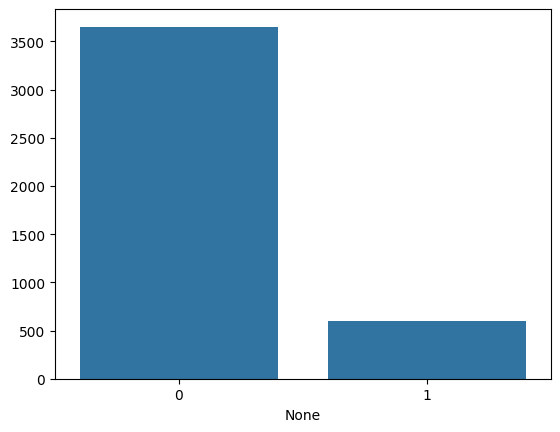

In [ ]:
## Proportion of churn (target variable)
display(df['churn'].value_counts()/len(df))
print(df.churn.value_counts())

create_count_plot(df['churn'], orient = 'horizontal')

**Observation :**
*   85.9% data menunjukkan customer yang tidak churn dan hanya 14% dari total samples yang churn.

## 3.2 Account Length

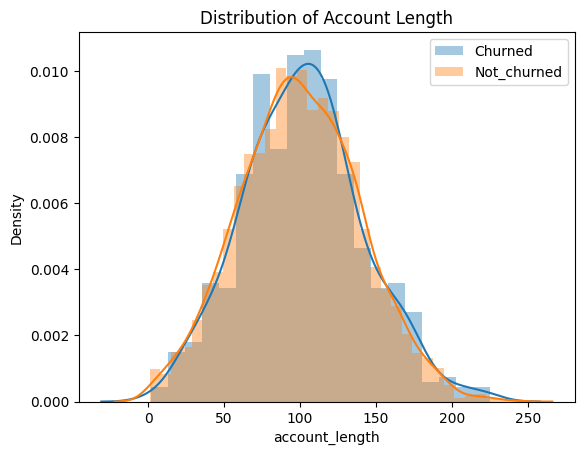

In [ ]:
# Membuat grafik distrbusi Account Length terhadap churn
acount_len_churned = df[df["churn"]==1]["account_length"]
acount_len_not_churned =df[df["churn"]==0]["account_length"]
sns.distplot(acount_len_churned,label="Churned")
sns.distplot(acount_len_not_churned,label="Not_churned")
plt.title('Distribution of Account Length')
plt.legend()
plt.show()

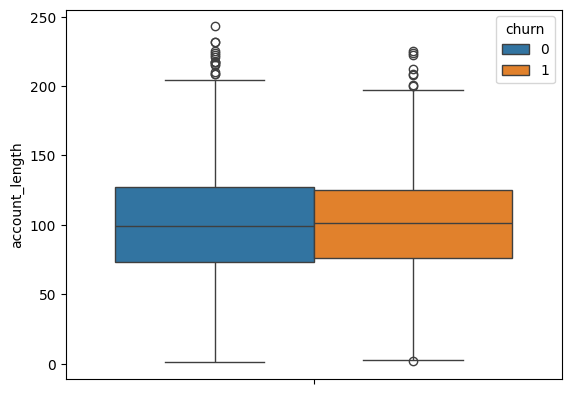

In [ ]:
sns.boxplot(y = df["account_length"], hue=df["churn"])
plt.show()

Berdasarkan hasil visualisasi maka :


*   Tidak ada pengaruh yang cukup besar dari account_length terhadap terjadinya churn
*   Terdapat outliers pada data di column account length



## 3.3 Voice Mail Plan and number vmail messages

<Axes: xlabel='voice_mail_plan', ylabel='churn'>

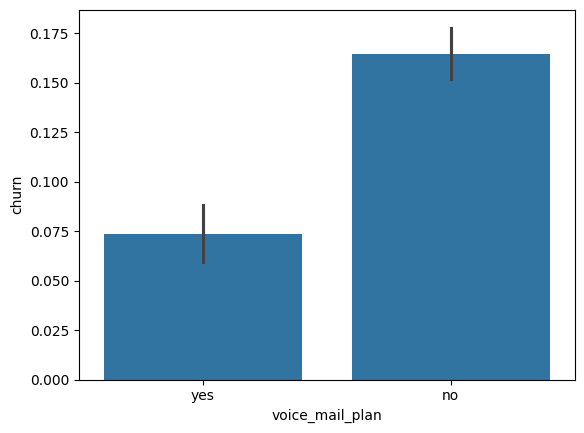

In [ ]:
sns.barplot(x = df["voice_mail_plan"], y = df["churn"])

churn               0    1  Percentage_Churn
voice_mail_plan                             
no               2622  516         16.443595
yes              1030   82          7.374101


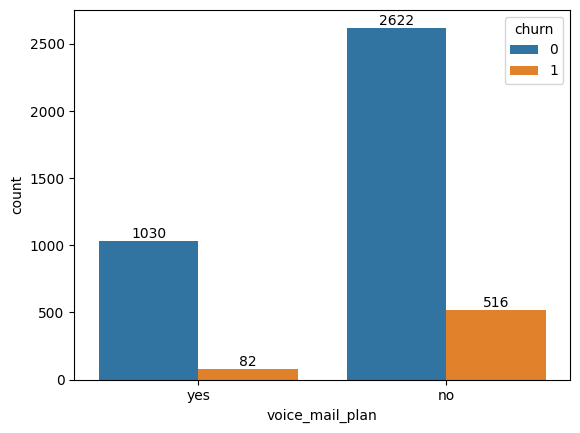

In [ ]:
vmail_persentase = pd.crosstab(df["voice_mail_plan"],df["churn"])
vmail_persentase['Percentage_Churn'] = vmail_persentase.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(vmail_persentase)

vmail_plan_churn = sns.countplot(x=df["voice_mail_plan"],hue=df["churn"])
for i in vmail_plan_churn.containers :
  vmail_plan_churn.bar_label(i,)

<Axes: ylabel='number_vmail_messages'>

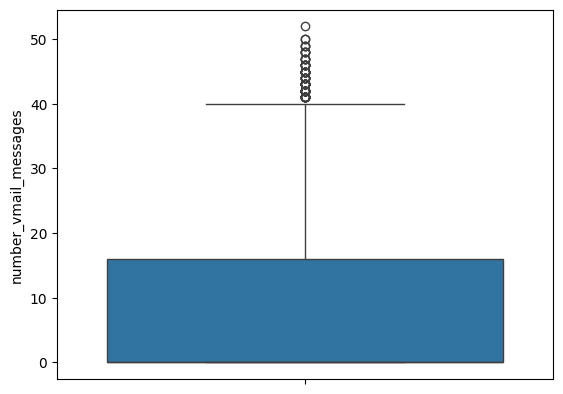

In [ ]:
sns.boxplot(df["number_vmail_messages"])

<Axes: xlabel='voice_mail_plan', ylabel='number_vmail_messages'>

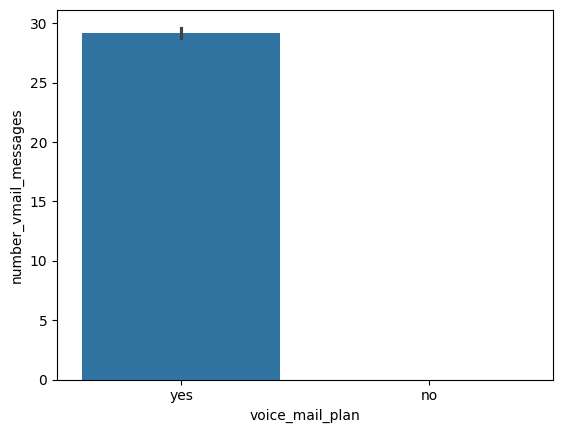

In [ ]:
sns.barplot(x = df["voice_mail_plan"], y = df["number_vmail_messages"])

Berdasarkan visualisasi diatas maka :


*   Customer yang tidak menggunakan voice_mail_plan maka tidak akan memiliki vmail_messages
*   Column vmail_messages bisa di remove karena sudah terwakilkan oleh column voice_mail_plan
* Customer yang tidak menggunakan voice_mail_plan justru cenderung melakukan churn lebih besar (16.4%)
* voice_mail_plan dari provider cukup baik karena customer churn dari pelanggan yang menggunakan voice_mail_plan cukup kecil (7.3%)



## 3.4 International Plan

churn                  0    1  Percentage Churn
international_plan                             
no                  3423  431         11.183186
yes                  229  167         42.171717


<Axes: xlabel='international_plan', ylabel='count'>

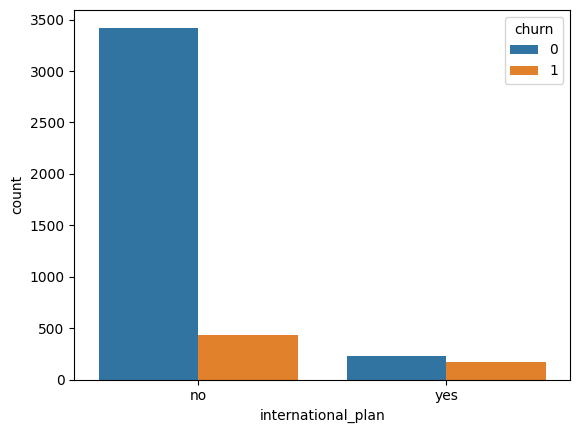

In [ ]:
## Persentase International Plan vs Churn
international_plan_churn = pd.crosstab(df['international_plan'], df['churn'])
international_plan_churn['Percentage Churn'] = international_plan_churn.apply(lambda x : x[1] * 100/(x[0] + x[1]), axis =1)
print(international_plan_churn)

## Analisis berdasarkan countplot
sns.countplot(x=df["international_plan"], hue=df["churn"])

Berdasarkan hasil analisis column International Plan maka :


*   Customer yang tidak memiliki international_plan lebih banyak daripada yang memiliki international_plan
*   Namun persentase dari customer yang memiliki international_plan untuk churning cukup besar yaitu 42.17 %
* **Hipotesis** : Kemungkinan ada pengaruh dari paket roaming dengan beberapa problem (jaringan, harga maupun kualitas layanannya yang masih kurang) sehingga memilih untuk mencari provider lain yang lebih baik dalam layanan international



## 3.5 State Column

In [ ]:
##cek unique value dari column state
df['state'].nunique()

51

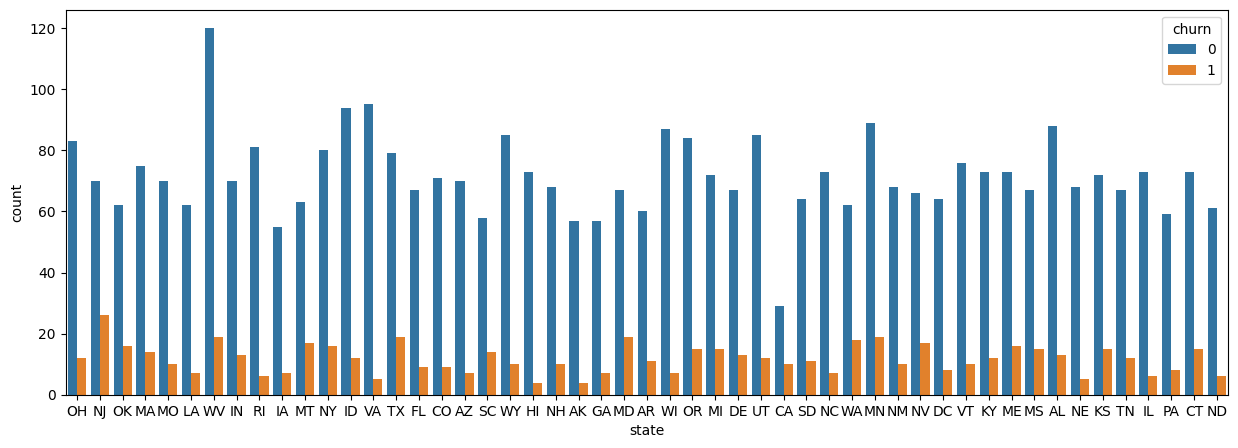

In [ ]:
## Membandingkan churn berdasarkan state nya
plt.figure(figsize = (15, 5))
state_churn = sns.countplot(x = df['state'], hue = df['churn'])
plt.show()

In [ ]:
## Persentase State vs Churn
state_data = pd.crosstab(df['state'], df['churn'])
state_data['Percentage_Churn'] = state_data.apply(lambda x: x[1] * 100 / (x[0] + x[1]), axis = 1)
state_data_sorted = state_data.sort_values(by = 'Percentage_Churn', ascending = False)
print(state_data_sorted.head(10))

churn   0   1  Percentage_Churn
state                          
NJ     70  26         27.083333
CA     29  10         25.641026
WA     62  18         22.500000
MD     67  19         22.093023
MT     63  17         21.250000
OK     62  16         20.512821
NV     66  17         20.481928
SC     58  14         19.444444
TX     79  19         19.387755
MS     67  15         18.292683


Berdasarkan hasil analisis dapat dilihat bahwa :


*   Pesebaran data untuk column state normal yang terdiri dari 51 unique state
*   state NJ, CA, WA, MD, MT menjadi state dengan persentase churn paling tinggi (>21%)
* salah satu alasan besarnya churn rate diarea tersebut bisa jadi disebabkan cover area dari provider yang kurang baik di daerah tersebut



## 3.6 Area Code Column

In [ ]:
## Persentase area_code vs churn
area_code_persentase = pd.crosstab(df['area_code'], df['churn'])
area_code_persentase['Percentage_Churn'] = area_code_persentase.apply(lambda x : x[1] * 100/(x[0] + x[1]), axis = 1)
print(area_code_persentase.sort_values(by = 'Percentage_Churn', ascending = False))

churn             0    1  Percentage_Churn
area_code                                 
area_code_510   897  159         15.056818
area_code_408   934  152         13.996317
area_code_415  1821  287         13.614801


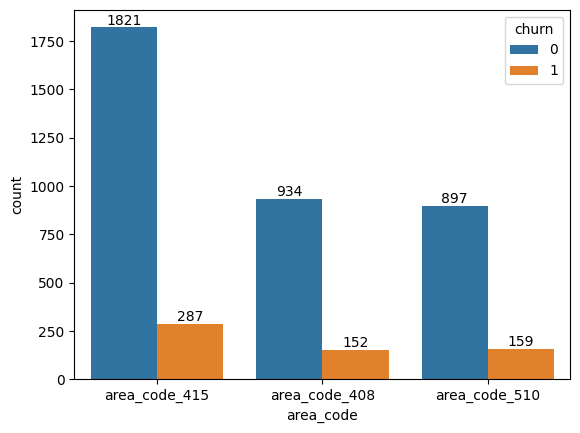

In [ ]:
area_code_churn = sns.countplot(x=df['area_code'], hue=df['churn'])
for i in area_code_churn.containers :
  area_code_churn.bar_label(i, )
plt.show()

Berdasarkan hasil visualisasi dapat dilihat bahwa :


*   terdapat 3 unique area_code
*   persentase dari setiap area_code untuk churn hampir merata / sama
* kemungkinan tidak ada keterkaitan yang bisa ditarik berdasarkan hubungan dari area_code dengan churn, namun persebaran datanya cukup bias karena area_code 415 cukup banyak dibandingkan 2 area_code lain



## 3.7 Customer Service Calls

churn                             0    1  Percentage_Churn
number_customer_service_calls                             
0                               789   97         10.948081
1                              1358  166         10.892388
2                               845  102         10.770855
3                               495   63         11.290323
4                               117   92         44.019139
5                                32   49         60.493827
6                                 9   19         67.857143
7                                 6    7         53.846154
8                                 1    1         50.000000
9                                 0    2        100.000000


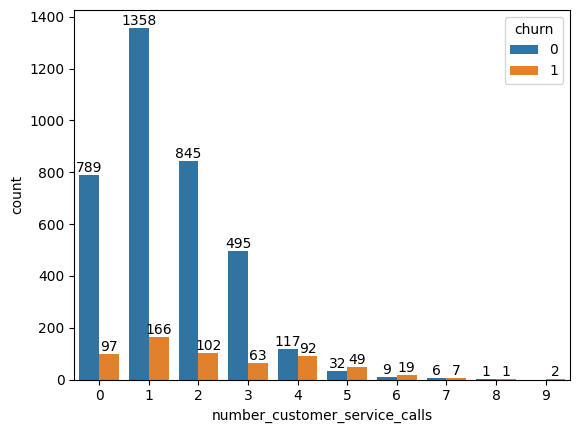

In [ ]:
#Persentase Customer service calls vs Churn
customer_service_calls_data = pd.crosstab(df["number_customer_service_calls"],df["churn"])
customer_service_calls_data['Percentage_Churn'] = customer_service_calls_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(customer_service_calls_data)

## Countplot untuk customer service calls vs churn
cs_churn = sns.countplot(x=df["number_customer_service_calls"], hue=df["churn"])
for i in cs_churn.containers :
  cs_churn.bar_label(i,)

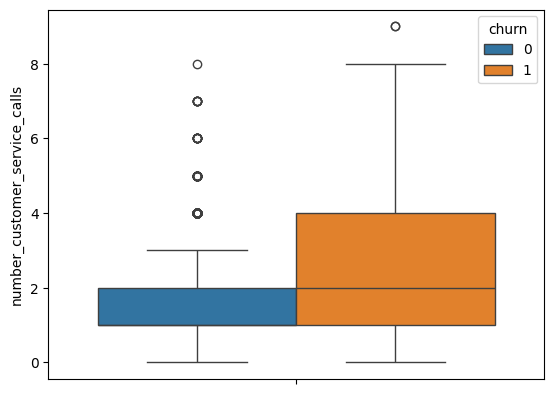

In [ ]:
sns.boxplot(y= df["number_customer_service_calls"],hue=df["churn"]);

Berdasarkan hasil visualisasi diatas dapat kita lihat bahwa customer yang telah melakukan customer_service_calls > 3 memiliki kemungkinan untuk churn cukup tinggi (> 40 %)

**Hipotesis** : Kemungkinan ada cukup banyak complain yang tidak teselesaikan setelah customer melakukan panggilan ke customer service ketika panggilannya >3 kali

## 3.8 Univariate Analysis


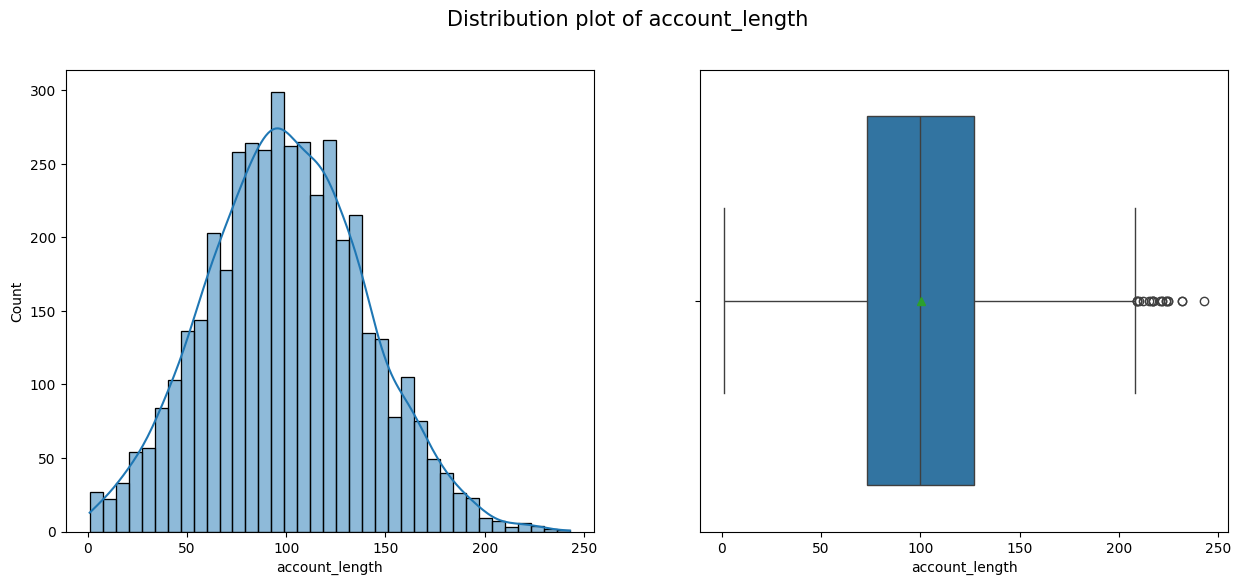

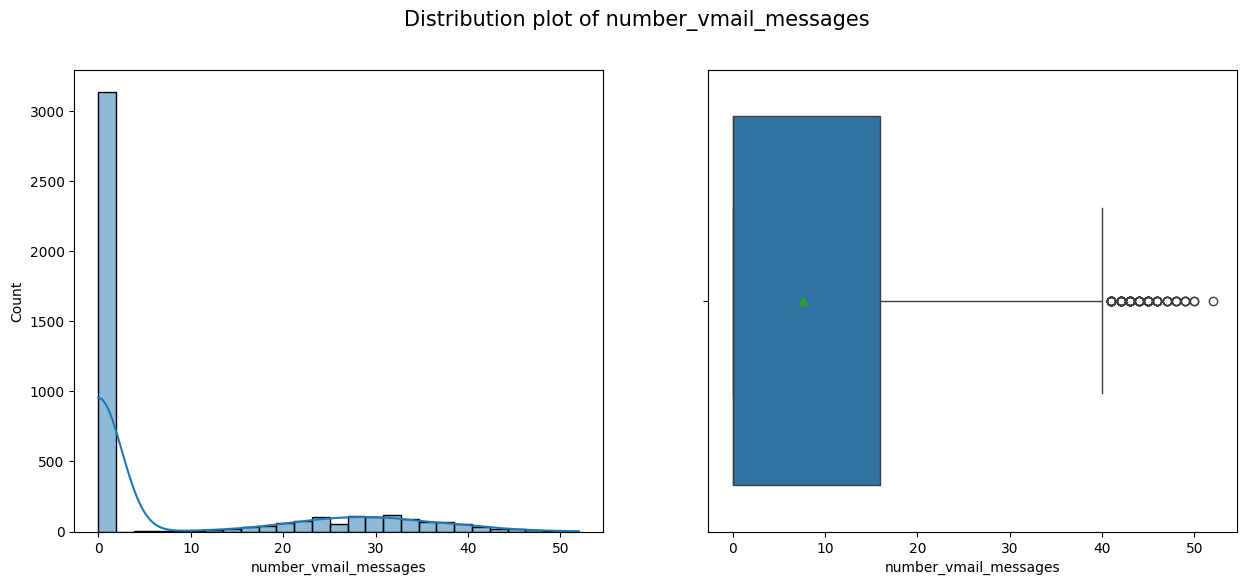

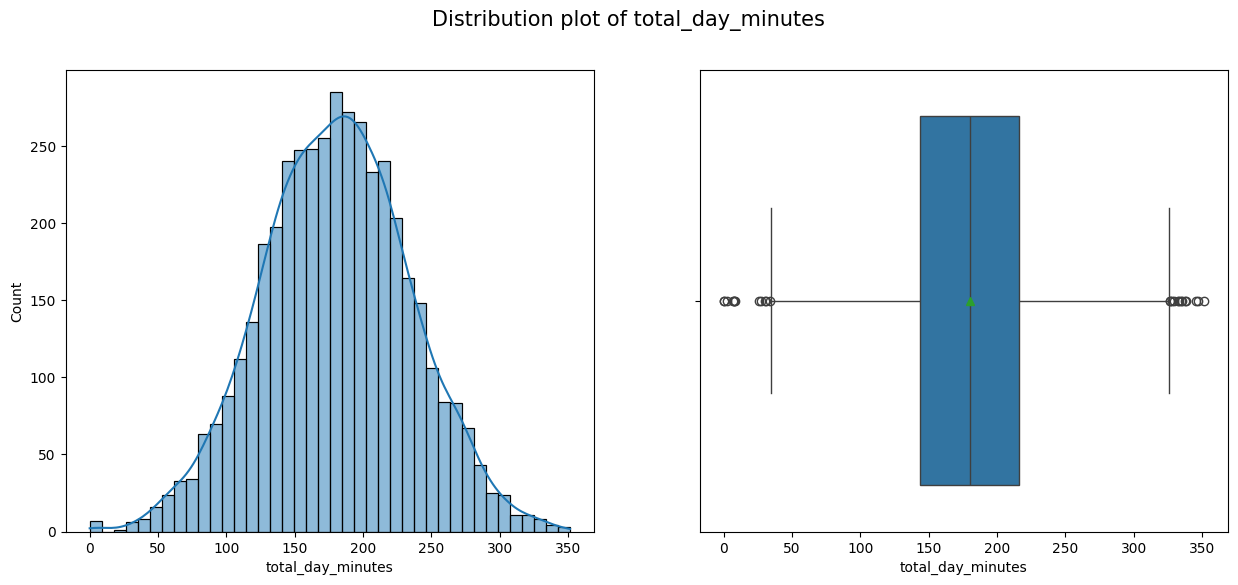

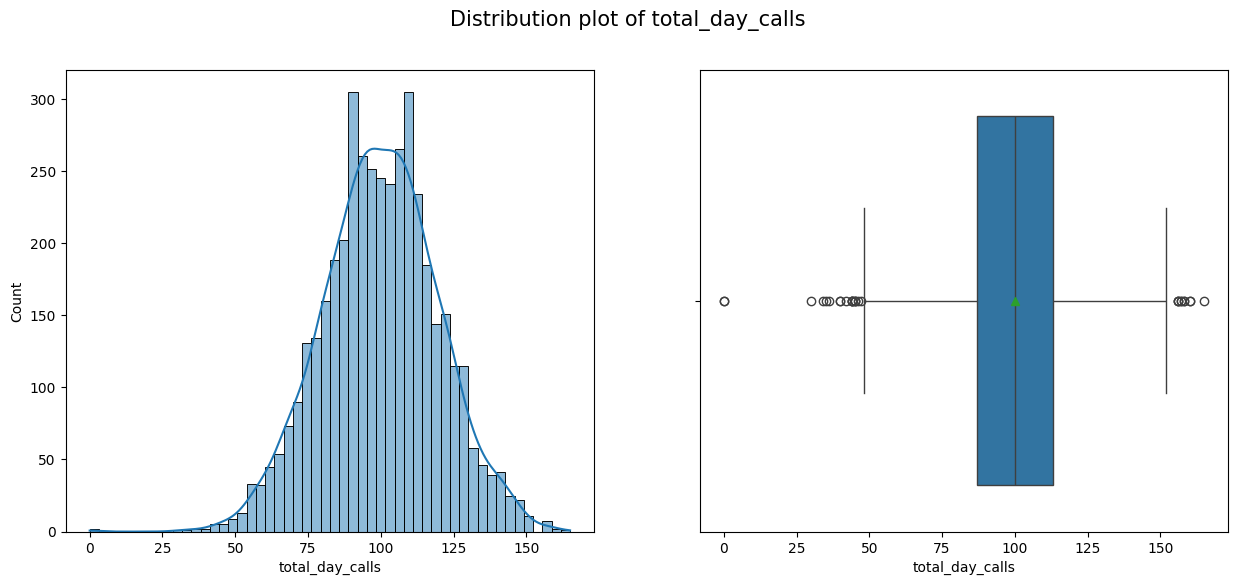

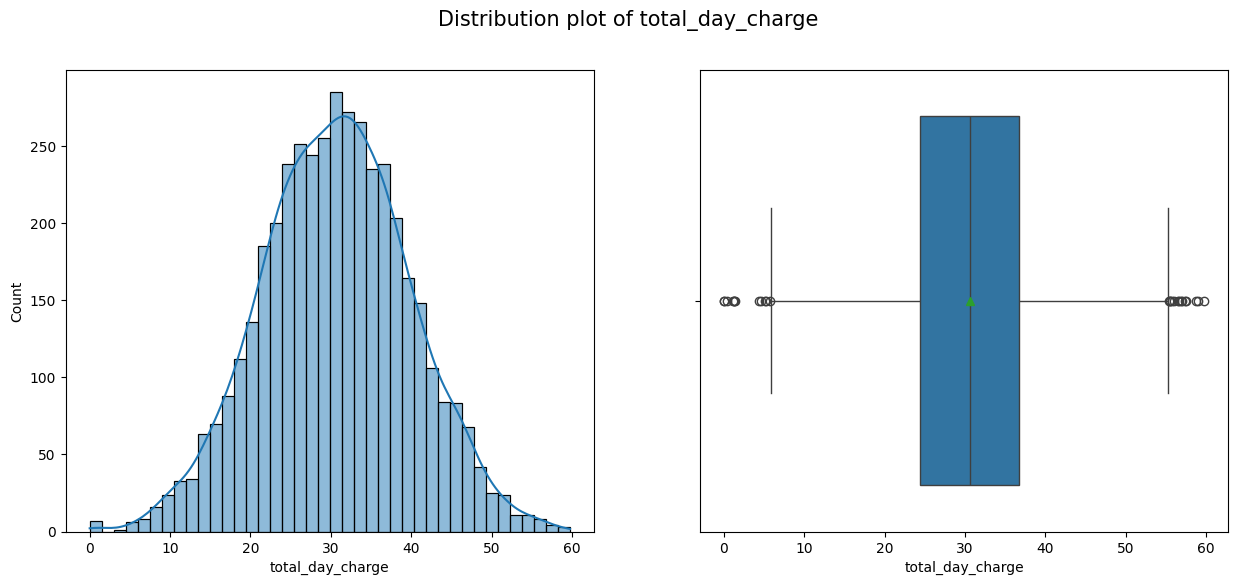

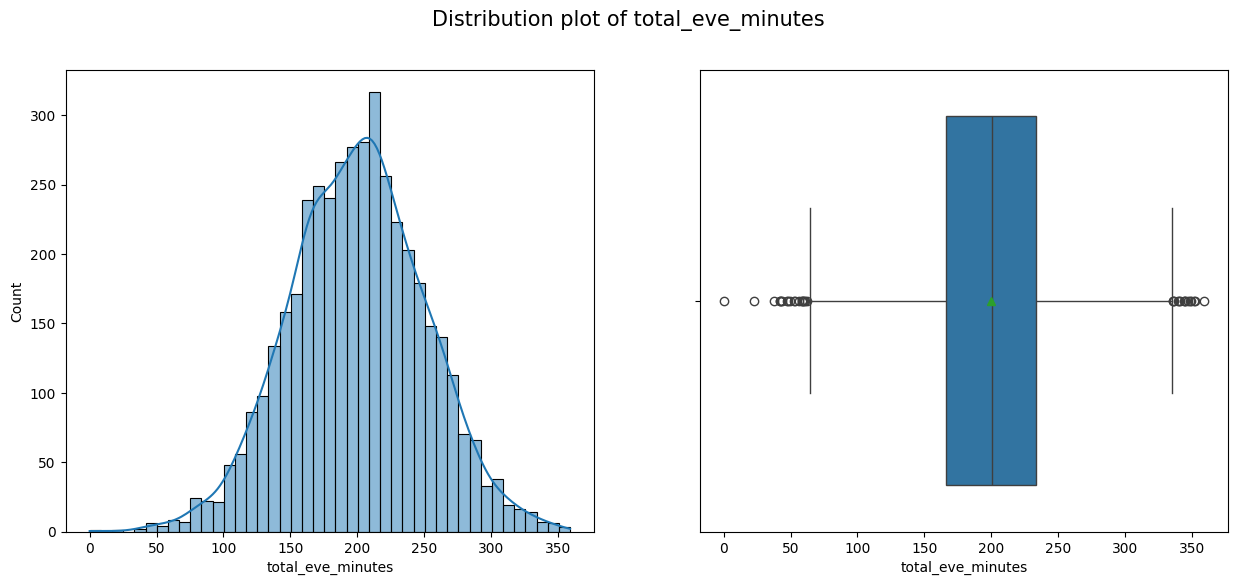

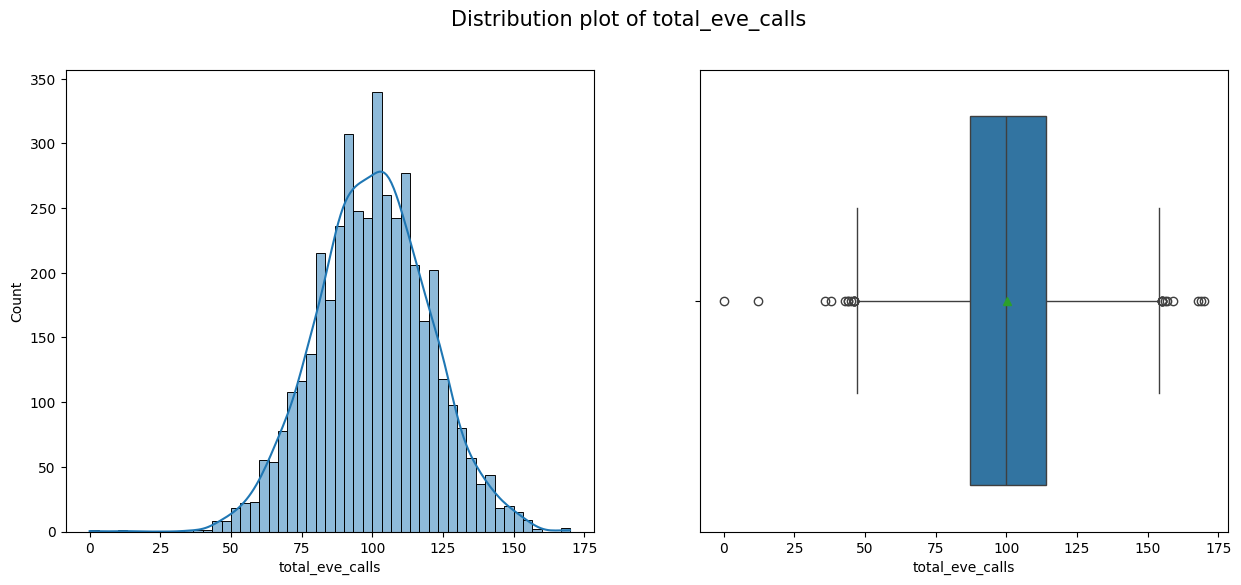

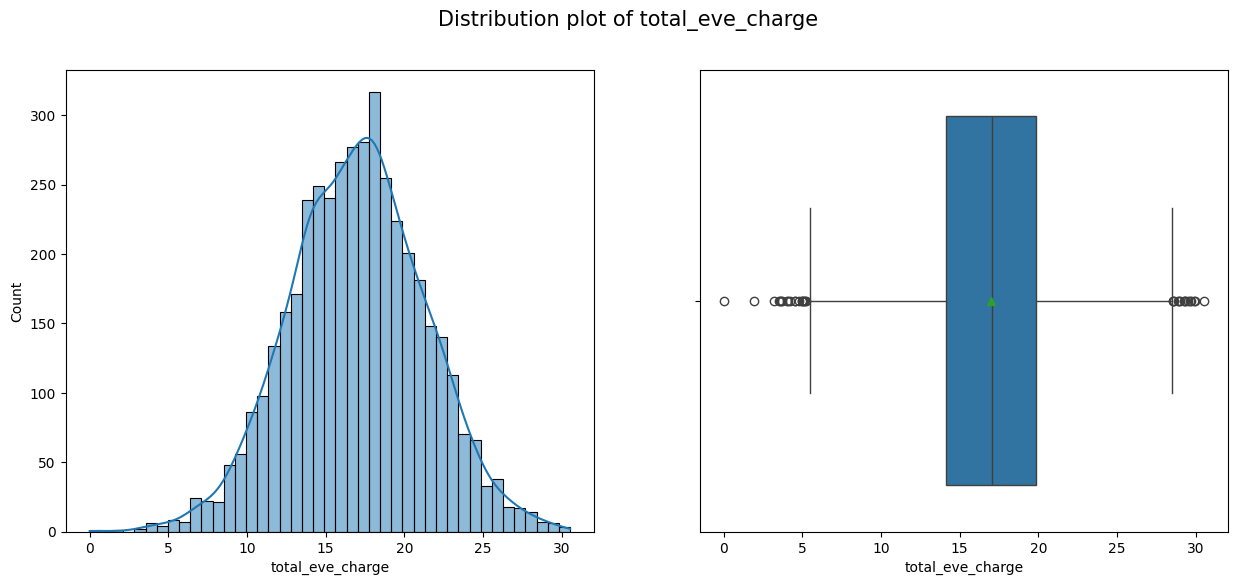

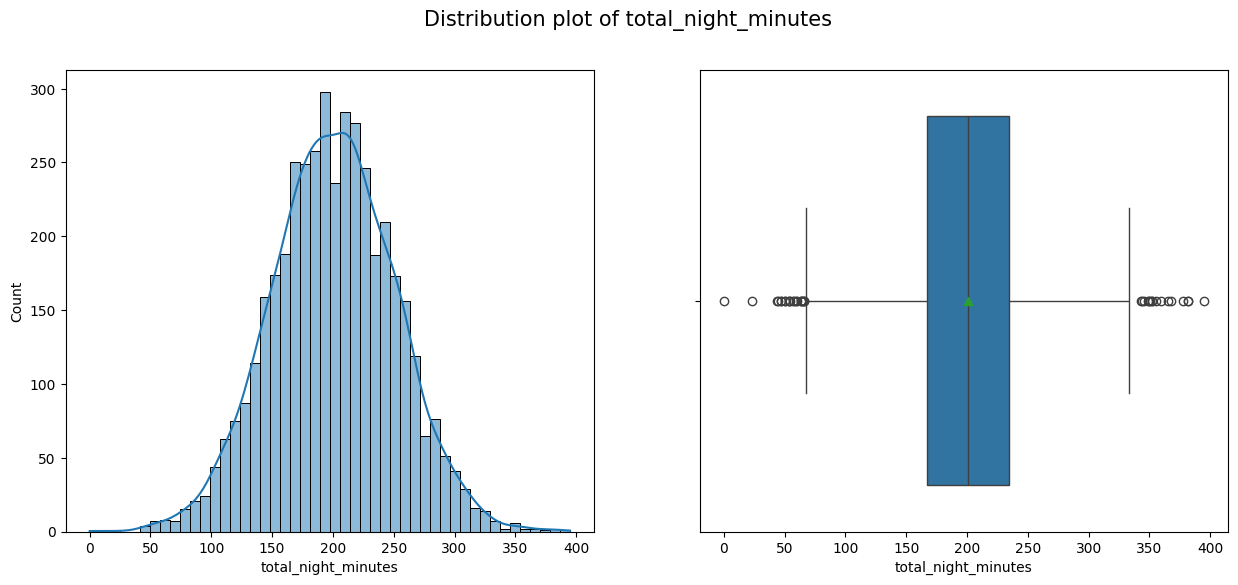

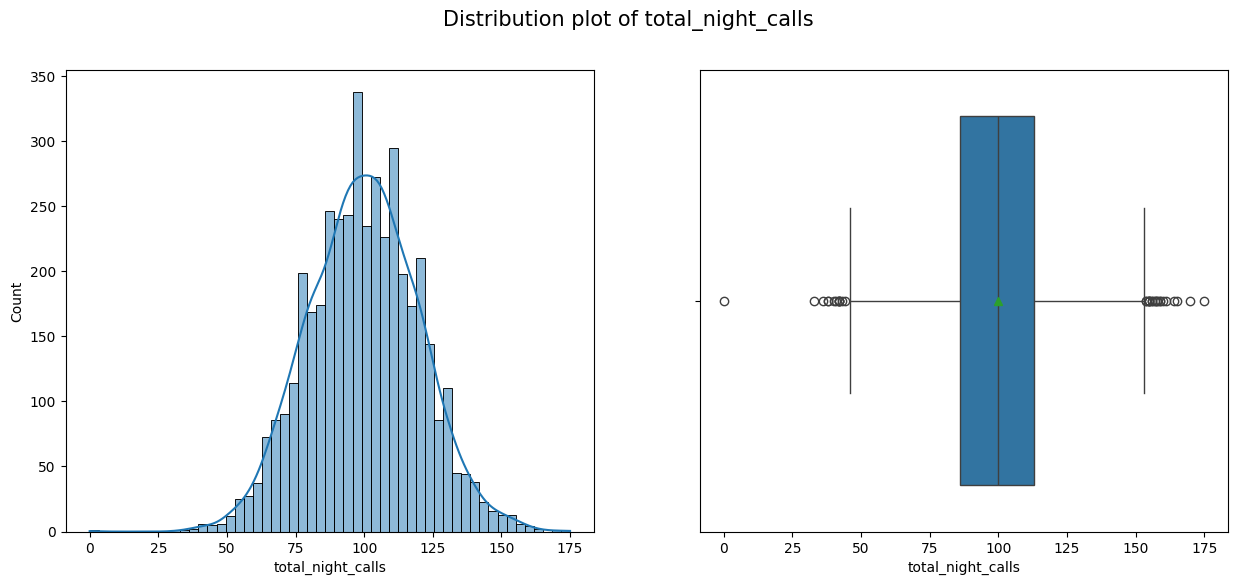

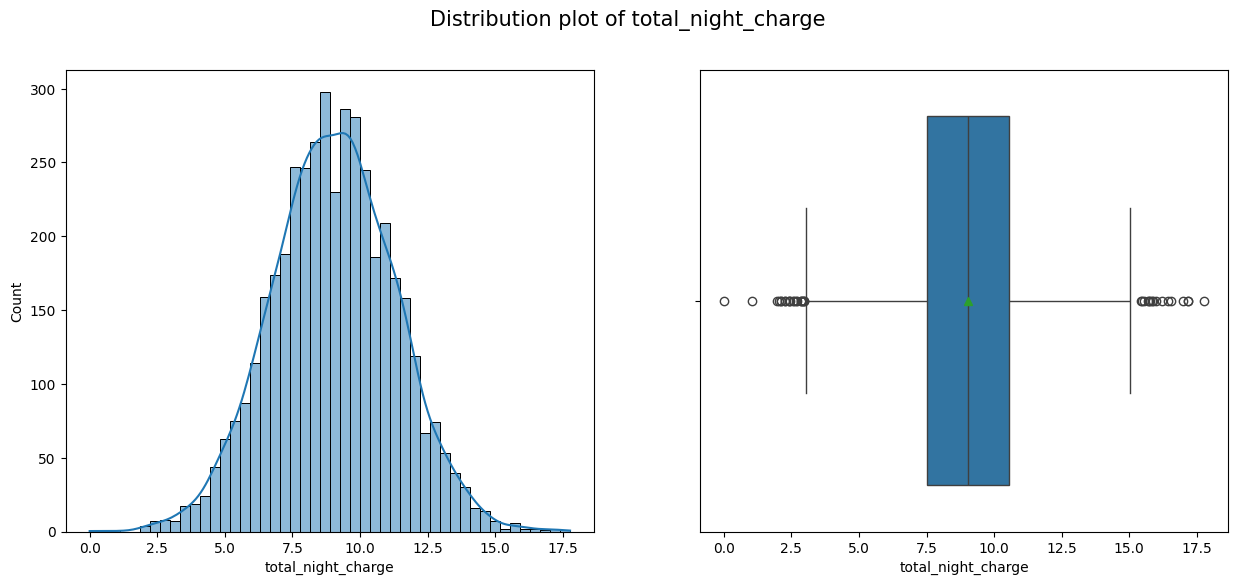

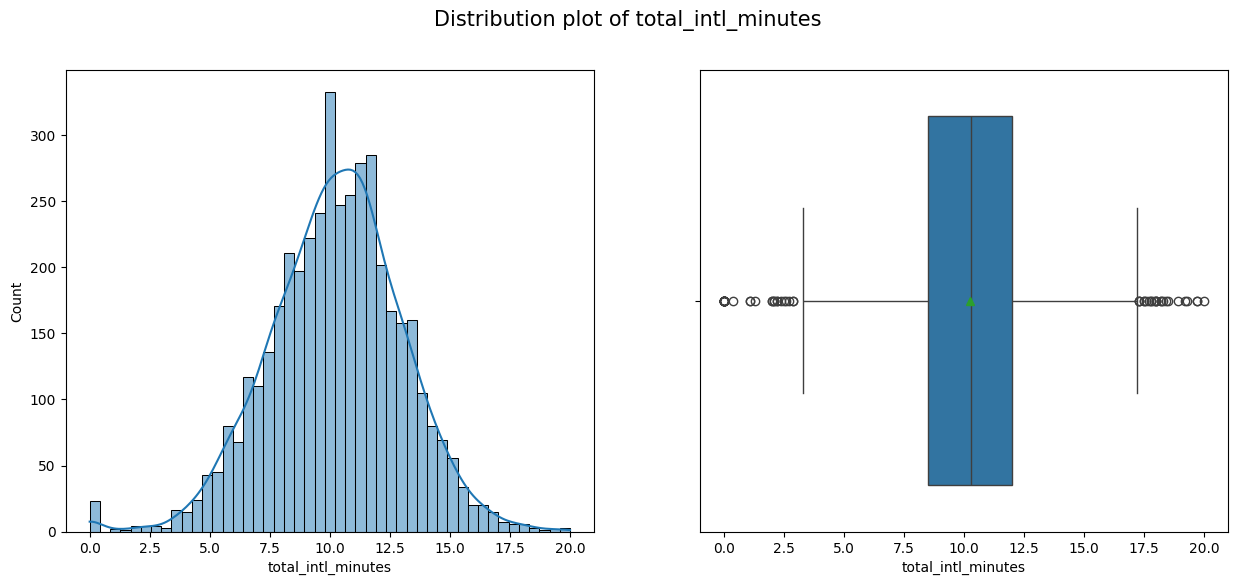

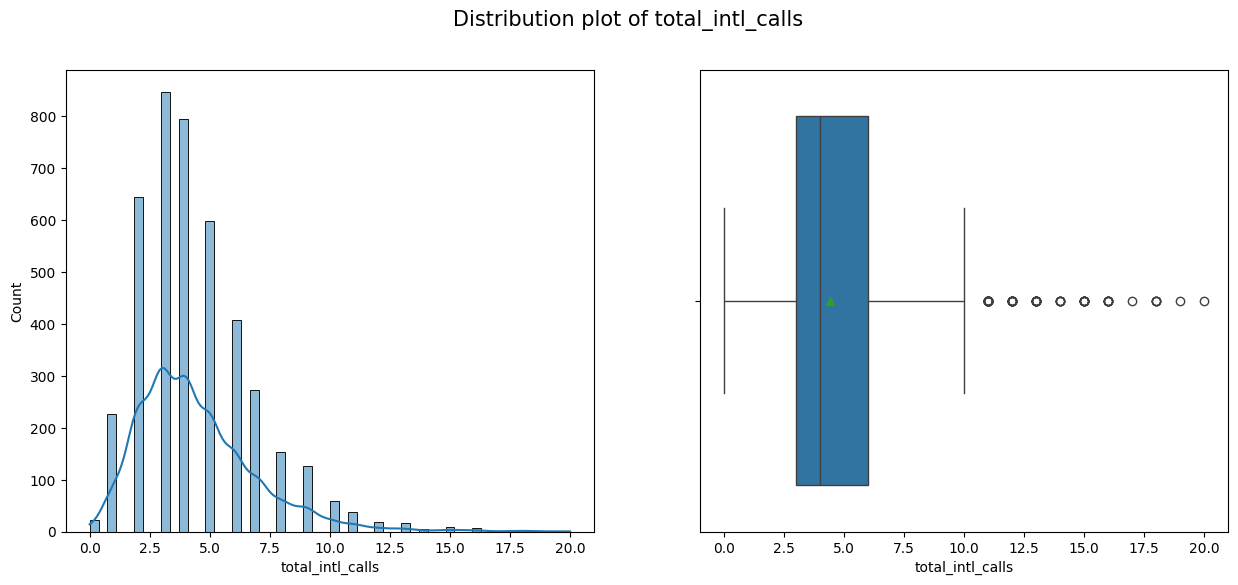

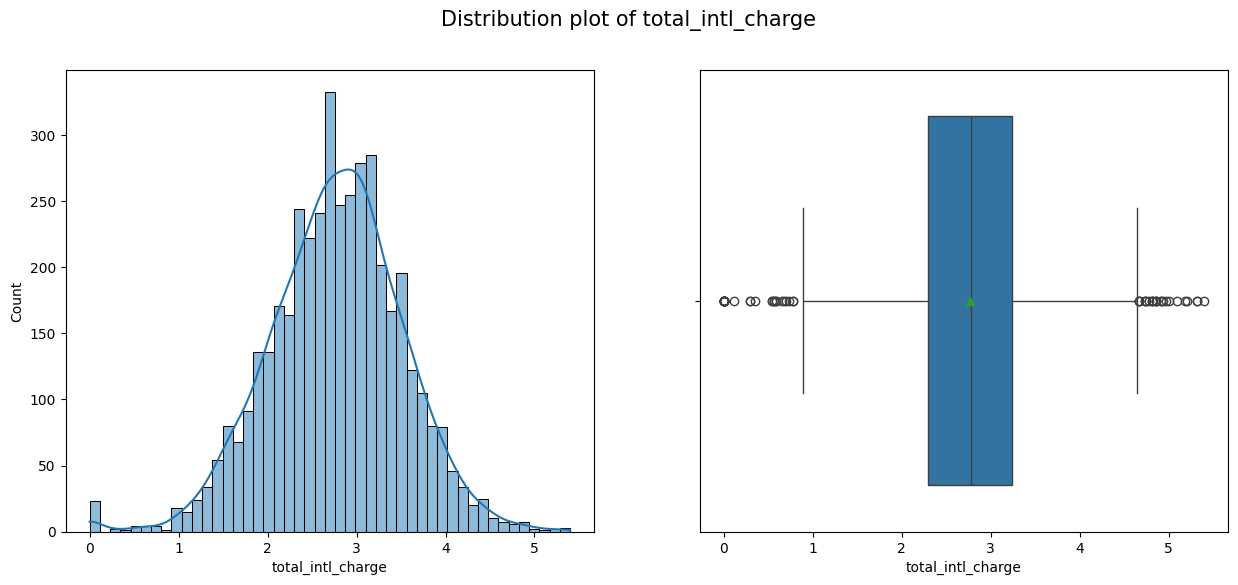

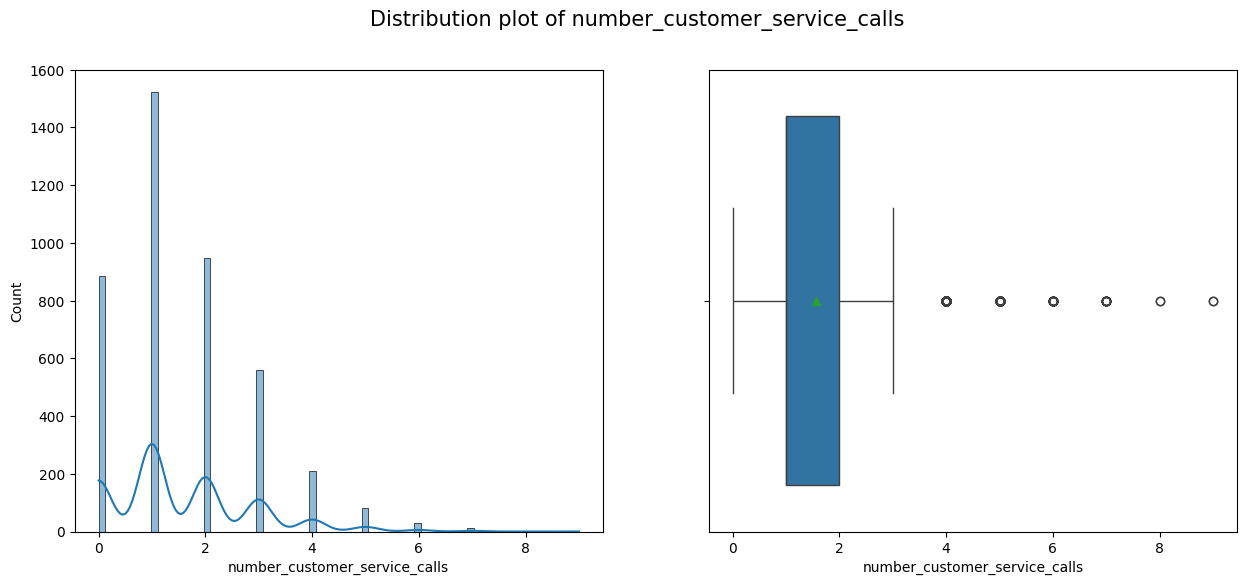

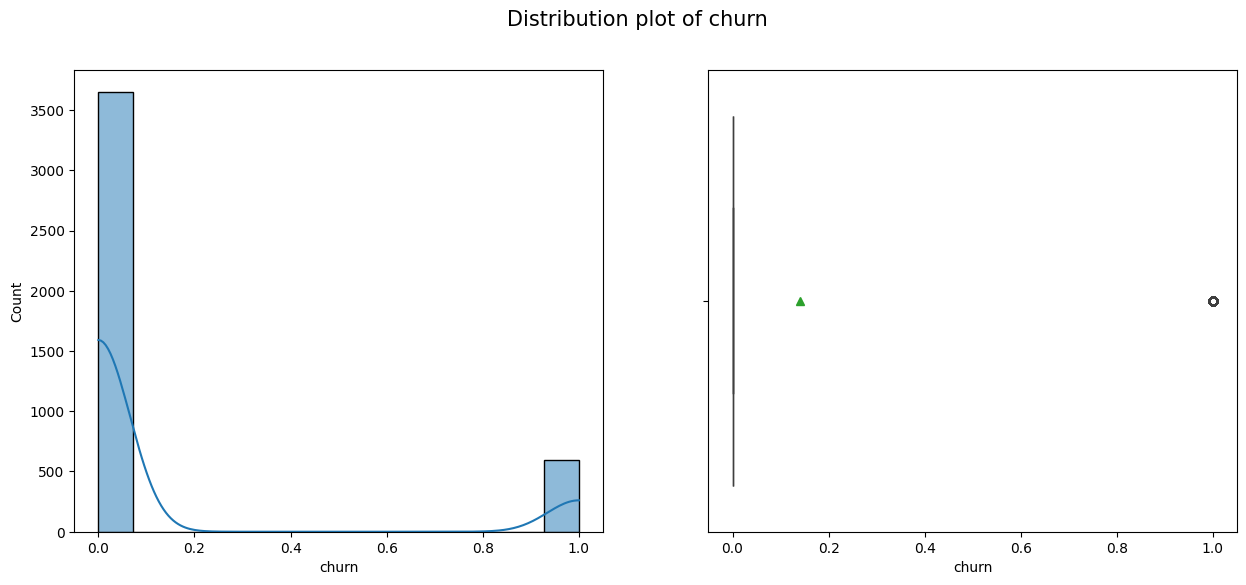

In [ ]:
# Histogram dan boxplot untuk melihat distribusi dan outlier
for col in df.describe().columns:
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
    sns.histplot(df[col], ax = axes[0],kde = True)
    sns.boxplot(df[col], ax = axes[1],orient='h',showmeans=True)
    fig.suptitle("Distribution plot of "+ col, fontsize = 15)
    plt.show()

Berdasarkan hasil visualisasi Univariate Analysis maka :


*   Terdapat beberapa outliers yang dapat dihapus
*   Berdasarkan distribusinya ada beberapa column yang distrbibusinya kurang merata (number_vmail_messages, total_intl_calls, number_customer_service_call, churn)
* Pada jenis variable charge dan minutes memiliki distribusi histogram yang mirip yang kemungkinan berkorelasi



## 3.9 Bivariate Analysis

<Axes: >

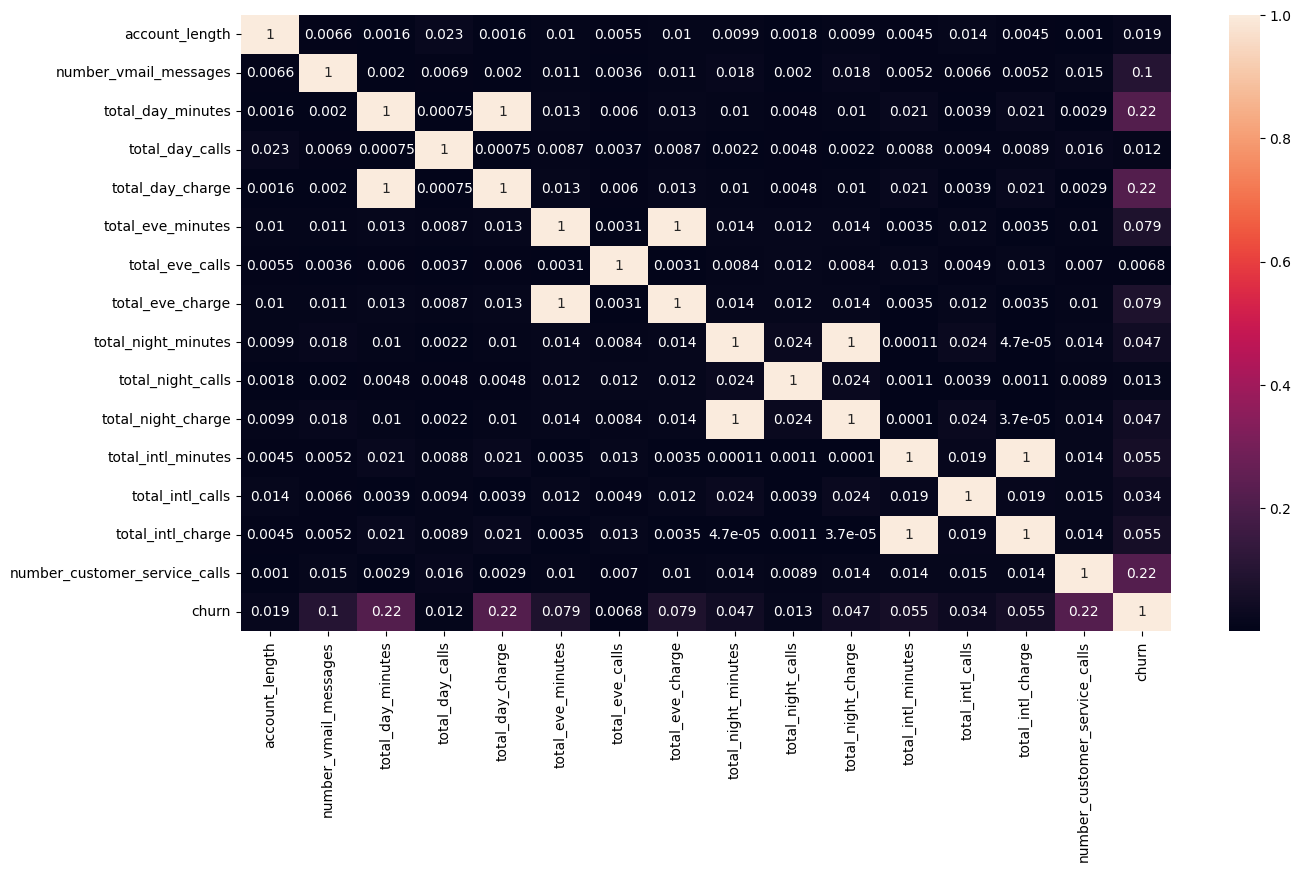

In [ ]:
## Heatmap untuk melihat korelasi antar column
plt.figure(figsize = (15, 8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot = True)

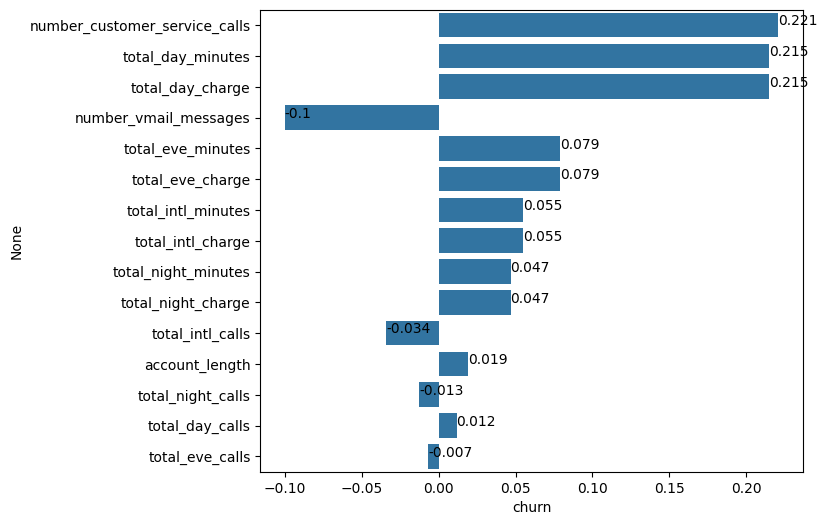

In [ ]:
def feature_corr_churn(target='churn', features_filter=[], data=df):
    # Correlation
    usecol = [c for c in data.corr().columns if c != target]
    if features_filter != []:
        usecol = [c for c in usecol if c in features_filter]

    df_corr = pd.DataFrame(data.corr()[target].loc[usecol])
    df_corr[target+'_abs'] = np.abs(df_corr[target])
    df_corr = df_corr.sort_values(target+'_abs', ascending=False)

    # Plot
    plt.figure(figsize=(7, 6))
    target_corr = sns.barplot(y=df_corr.index, x=round(df_corr['churn'], 3))
    for i in range(len(df_corr)):
        target_corr.text(df_corr['churn'][i], i, round(df_corr['churn'][i], 3), ha='left')
    plt.show()

feature_corr_churn()

Berdasarkan visualisasi correlation heatmap diatas maka bisa dilihat bahwa column total day charge & total day minute, total evening charge & total evening minute, total night charge & total night minute memiliki korelasi positif yang tinggi

# 3.10 Kesimpulan Exploratory Data Analysis
*   Kemungkinan data memiliki distrbusi yang kurang baik karena beberapa data (termasuk variable target) memiliki data yang timpang
* Customer yang memiliki International Plan cenderung untuk melakukan churn cukup besar
* Customer yang memiliki customer service calls > 4 memiliki nilai persentase churn cukup tinggi (> 40%)
*   Seluruh column charge memiliki korelasi dengan column minutes



# 4. Data Engineering

In [ ]:
df[["state","churn"]].groupby("state").mean().sort_values(by = 'churn', ascending = False)

,churn
state,
NJ,0.270833
CA,0.256410
WA,0.225000
MD,0.220930
MT,0.212500
OK,0.205128
NV,0.204819
SC,0.194444
TX,0.193878


In [ ]:
def encode_yes_no(value) :
  if value == 'yes':
    return 1
  elif value == 'no':
    return 0
  else :
    return 0

df['international_plan'] = df['international_plan'].apply(encode_yes_no)
df['voice_mail_plan'] = df['voice_mail_plan'].apply(encode_yes_no)
df_test['international_plan'] = df_test['international_plan'].apply(encode_yes_no)
df_test['voice_mail_plan'] = df_test['voice_mail_plan'].apply(encode_yes_no)

In [ ]:
display(df.head(2))
display(df_test.head(2))

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_all_minutes,total_all_calls,total_all_charge,total_all
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,611.5,329,55.54,996.04
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,527.2,328,59.00,914.20


,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_all_minutes,total_all_calls,total_all_charge,total_all
0,1,KS,128,area_code_415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,707.2,300,72.86,1080.06
1,2,AL,118,area_code_510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.7,0,647.9,317,65.91,1030.81


In [ ]:
def add_new_column(data = df) :
  data['total_all_minutes'] = data['total_day_minutes'] + data['total_eve_minutes'] + data['total_night_minutes']
  data['total_all_calls'] = data['total_day_calls'] + data['total_eve_calls'] + data['total_night_calls']
  data['total_all_charge'] = data['total_day_charge'] + data['total_eve_charge'] + data['total_night_charge']
  data['total_all'] = data['total_all_minutes'] + data['total_all_calls'] + data['total_all_charge']
  data = data.fillna(0)
  return data
df = add_new_column(data = df)
df_test = add_new_column(data = df_test)

In [ ]:
def add_norm_column(data = df) :
  data['account_length_norm'] = MinMaxScaler().fit_transform(data['account_length'].values.reshape(len(data), 1))
  data['total_intl_minutes_norm'] = MinMaxScaler().fit_transform(data['total_intl_minutes'].values.reshape(len(data), 1))
  data['total_intl_calls_norm'] = MinMaxScaler().fit_transform(data['total_intl_calls'].values.reshape(len(data), 1))
  data['total_intl_charge_norm'] = MinMaxScaler().fit_transform(data['total_intl_charge'].values.reshape(len(data), 1))
  data['number_customer_service_calls_norm'] = MinMaxScaler().fit_transform(data['number_customer_service_calls'].values.reshape(len(data), 1))
  data['total_all_minutes_norm'] = MinMaxScaler().fit_transform(data['total_all_minutes'].values.reshape(len(data), 1))
  data['total_all_calls_norm'] = MinMaxScaler().fit_transform(data['total_all_calls'].values.reshape(len(data), 1))
  data['total_all_charge_norm'] = MinMaxScaler().fit_transform(data['total_all_charge'].values.reshape(len(data), 1))
  data['total_all_norm'] = MinMaxScaler().fit_transform(data['total_all'].values.reshape(len(data), 1))
  data = data.fillna(0)
  return data
df = add_norm_column(data = df)
df_test = add_norm_column(data = df_test)

In [ ]:
# Target Mean Encoding
def target_mean_encoding(features, target, df = df):
  df_encoding = df[[features, target]].groupby(features).mean()
  df_encoding.rename(columns={target:features+"_proba"},inplace=True)
  return df_encoding.reset_index()

def run_target_mean_encoding(data=df, df=df):
  master_state = target_mean_encoding(features='state',target='churn',df=df)
  master_area_code = target_mean_encoding(features='area_code',target='churn',df=df)
  drop_col_check = ['state_proba', 'area_code_proba']
  data.drop(drop_col_check, axis=1, errors='ignore', inplace=True)

  df_merge = pd.merge(data, master_state, on='state', how='left')
  df_merge = pd.merge(df_merge, master_area_code, on='area_code', how='left')

  return df_merge

df = run_target_mean_encoding(data = df, df = df)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_all_minutes,total_all_calls,total_all_charge,total_all,account_length_norm,total_intl_minutes_norm,total_intl_calls_norm,total_intl_charge_norm,number_customer_service_calls_norm,total_all_minutes_norm,total_all_calls_norm,total_all_charge_norm,total_all_norm,state_proba,area_code_proba
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,611.5,329,55.54,996.04,0.438017,0.685,0.15,0.685185,0.111111,0.558916,0.635135,0.489942,0.613283,0.126316,0.136148
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,527.2,328,59.00,914.20,0.561983,0.610,0.25,0.609259,0.000000,0.418813,0.630631,0.537614,0.500069,0.270833,0.136148
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,558.2,248,65.02,871.22,0.342975,0.330,0.35,0.329630,0.222222,0.470334,0.270270,0.620557,0.440613,0.126316,0.139963
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,501.9,356,49.36,907.26,0.305785,0.505,0.15,0.505556,0.333333,0.376766,0.756757,0.404795,0.490469,0.205128,0.136148
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0,779.3,314,76.28,1169.58,0.495868,0.375,0.35,0.375926,0.333333,0.837793,0.567568,0.775696,0.853350,0.157303,0.150568


In [ ]:
def pipeline_feature_preprocessing(data) :

  data = run_target_mean_encoding(data = data, df = df)

  data = add_new_column(data = data)

  drop_col = ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_day_calls',
              'total_eve_calls', 'total_night_calls', 'total_day_charge', 'total_eve_charge',
              'total_night_charge', 'state','total_all_charge','total_all_calls','total_all_minutes',
              'number_customer_service_calls', 'total_intl_charge', 'total_intl_calls',
              'total_intl_minutes', 'number_vmail_messages', 'total_all', 'account_length', 'id', 'state', 'area_code']
  data = data.drop(drop_col, axis = 1, errors = 'ignore')

  return data

df_train = pipeline_feature_preprocessing(data = df)
df_test_model = pipeline_feature_preprocessing(data = df_test)
print(df_train.shape, df_test_model.shape)

(4250, 14) (750, 13)


In [ ]:
display(df_train.head(2))
display(df_test_model.head(2))

,international_plan,voice_mail_plan,churn,account_length_norm,total_intl_minutes_norm,total_intl_calls_norm,total_intl_charge_norm,number_customer_service_calls_norm,total_all_minutes_norm,total_all_calls_norm,total_all_charge_norm,total_all_norm,state_proba,area_code_proba
0,0,1,0,0.438017,0.685,0.15,0.685185,0.111111,0.558916,0.635135,0.489942,0.613283,0.126316,0.136148
1,0,0,0,0.561983,0.610,0.25,0.609259,0.000000,0.418813,0.630631,0.537614,0.500069,0.270833,0.136148


,international_plan,voice_mail_plan,account_length_norm,total_intl_minutes_norm,total_intl_calls_norm,total_intl_charge_norm,number_customer_service_calls_norm,total_all_minutes_norm,total_all_calls_norm,total_all_charge_norm,total_all_norm,state_proba,area_code_proba
0,0,1,0.535865,0.529101,0.157895,0.529412,0.166667,0.765479,0.521505,0.748638,0.751439,0.172414,0.136148
1,1,0,0.493671,0.333333,0.315789,0.333333,0.000000,0.647422,0.612903,0.643462,0.670663,0.128713,0.150568


In [ ]:
df_train['voice_mail_plan'].nunique()

2

# 5. Modelling
   - Train Test Split
   - Model Fitting
   - Cross Val Evaluation
   - Model Selection

## 5.1 Train Test Split

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4250 entries, 0 to 4249
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   international_plan                  4250 non-null   int64  
 1   voice_mail_plan                     4250 non-null   int64  
 2   churn                               4250 non-null   int64  
 3   account_length_norm                 4250 non-null   float64
 4   total_intl_minutes_norm             4250 non-null   float64
 5   total_intl_calls_norm               4250 non-null   float64
 6   total_intl_charge_norm              4250 non-null   float64
 7   number_customer_service_calls_norm  4250 non-null   float64
 8   total_all_minutes_norm              4250 non-null   float64
 9   total_all_calls_norm                4250 non-null   float64
 10  total_all_charge_norm               4250 non-null   float64
 11  total_all_norm                      4250 no

In [ ]:
drop_col = []
target_col = ['churn']

X = df_train.drop(drop_col+target_col,axis=1)
y = df_train[target_col]

col_model = X.columns.tolist()
df_test_use = df_test_model[col_model]
print(X.shape, y.shape)

(4250, 13) (4250, 1)


In [ ]:
X.head(2)

,international_plan,voice_mail_plan,account_length_norm,total_intl_minutes_norm,total_intl_calls_norm,total_intl_charge_norm,number_customer_service_calls_norm,total_all_minutes_norm,total_all_calls_norm,total_all_charge_norm,total_all_norm,state_proba,area_code_proba
0,0,1,0.438017,0.685,0.15,0.685185,0.111111,0.558916,0.635135,0.489942,0.613283,0.126316,0.136148
1,0,0,0.561983,0.610,0.25,0.609259,0.000000,0.418813,0.630631,0.537614,0.500069,0.270833,0.136148


In [ ]:
test_size = 0.33
seed = 123
X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X,
                                                                  y,
                                                                  test_size=test_size,
                                                                  random_state=seed,
                                                                  stratify = y)
print("Data Train:",X_train.shape, Y_train.shape)
print("Data Test:",X_val.shape, Y_val.shape)

Data Train: (2847, 13) (2847, 1)
Data Test: (1403, 13) (1403, 1)


##5.2 Model Fitting

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score

In [ ]:
model_lr = LogisticRegression()
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()
model_gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=5)
model_nb = GaussianNB()
model_knn = KNeighborsClassifier(n_neighbors=9)

print("Run Logistics Regression")
model_lr.fit(X_train, Y_train)
print("Run Decision Tree")
model_dt.fit(X_train, Y_train)
print("Run Random Forest")
model_rf.fit(X_train, Y_train)
print("Run Gradient Boosting")
model_gb.fit(X_train, Y_train)
print("Run Naive Bayes")
model_nb.fit(X_train, Y_train)
print("Run KNN")
model_knn.fit(X_train, Y_train)

Run Logistics Regression
Run Decision Tree
Run Random Forest
Run Gradient Boosting
Run Naive Bayes
Run KNN


KNeighborsClassifier(n_neighbors=9)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score

model_list = ["model_lr","model_dt","model_rf","model_gb","model_nb","model_knn"]
score_train = []
score_test = []

for model_name in model_list:
    open_model = eval(model_name)
    # Menghitung prediksi
    y_train_pred = open_model.predict(X_train)
    y_val_pred = open_model.predict(X_val)

    # Menghitung skor akurasi
    acc_train = open_model.score(X_train, Y_train)
    acc_test = open_model.score(X_val, Y_val)
    score_train.append(acc_train)
    score_test.append(acc_test)

# Membuat DataFrame
df_eval = pd.DataFrame({
    "model": model_list,
    "acc_train": score_train,
    "acc_test": score_test
})

df_eval

,model,acc_train,acc_test
0,model_lr,0.867931,0.863150
1,model_dt,1.000000,0.949394
2,model_rf,1.000000,0.973628
3,model_gb,0.978574,0.975766
4,model_nb,0.867931,0.870991
5,model_knn,0.921672,0.918746


In [ ]:
def model_comparison_engine(X = X, y = y, fold = 5, sampling_method = None) :
  kfold = model_selection.KFold(n_splits=fold, shuffle = True, random_state = 42)

  model_lr = LogisticRegression()
  model_dt = DecisionTreeClassifier()
  model_rf = RandomForestClassifier()
  model_gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=5)
  model_nb = GaussianNB()
  model_knn = KNeighborsClassifier(n_neighbors=9)

  model_list = ["model_lr","model_dt","model_rf","model_gb","model_nb","model_knn"]
  acc_list = []
  prec_list = []
  rec_list = []
  auc_list = []

  for model_name in model_list:
    print(model_name)
    open_model = eval(model_name)

    if sampling_method == 'SMOTE' :
      X_resampled, y_resampled = SMOTE().fit_resample(X, y)
    elif sampling_method == 'oversampling' :
      X_resampled, y_resampled = RandomOverSampler().fit_resample(X, y)
    elif sampling_method == 'undersampling' :
      X_resampled, y_resampled = RandomUnderSampler().fit_resample(X, y)
    else:
      X_resampled, y_resampled = X, y

    accuracy = model_selection.cross_val_score(open_model, X_resampled, y_resampled, cv=kfold, scoring='accuracy')
    precision = model_selection.cross_val_score(open_model, X_resampled, y_resampled, cv=kfold, scoring='precision')
    recall = model_selection.cross_val_score(open_model, X_resampled, y_resampled, cv=kfold, scoring='recall')
    auc = model_selection.cross_val_score(open_model, X_resampled, y_resampled, cv=kfold, scoring='roc_auc')

    acc_list.append(accuracy.mean())
    prec_list.append(precision.mean())
    rec_list.append(recall.mean())
    auc_list.append(auc.mean())

  df_eval = pd.DataFrame()
  df_eval ['model'] = model_list
  df_eval ['accuracy'] = acc_list
  df_eval ['precision'] = prec_list
  df_eval ['recall'] = rec_list
  df_eval ['auc'] = auc_list

  return df_eval

In [ ]:
model_comparison_engine(X=X, y=y, fold = 5, sampling_method = None)

model_lr
model_dt
model_rf
model_gb
model_nb
model_knn


,model,accuracy,precision,recall,auc
0,model_lr,0.869647,0.616732,0.198013,0.835450
1,model_dt,0.949412,0.817027,0.836795,0.904178
2,model_rf,0.973176,0.976445,0.826574,0.926166
3,model_gb,0.972000,0.977354,0.818150,0.929757
4,model_nb,0.872235,0.542111,0.597194,0.863650
5,model_knn,0.913882,0.872498,0.452315,0.890785


In [ ]:
model_comparison_engine(X=X, y=y, fold = 5, sampling_method = 'SMOTE')

model_lr
model_dt
model_rf
model_gb
model_nb
model_knn


,model,accuracy,precision,recall,auc
0,model_lr,0.797645,0.790699,0.809447,0.850483
1,model_dt,0.956052,0.948202,0.960728,0.953237
2,model_rf,0.973577,0.992309,0.952774,0.996664
3,model_gb,0.934147,0.991638,0.875794,0.973644
4,model_nb,0.815992,0.821741,0.807188,0.869071
5,model_knn,0.899643,0.857517,0.958373,0.973104


In [ ]:
model_comparison_engine(X=X, y=y, fold = 5, sampling_method = 'oversampling')

model_lr
model_dt
model_rf
model_gb
model_nb
model_knn


,model,accuracy,precision,recall,auc
0,model_lr,0.783132,0.783437,0.782604,0.838831
1,model_dt,0.980421,0.961573,0.999446,0.980560
2,model_rf,0.998083,0.995055,0.999736,0.999863
3,model_gb,0.931546,0.992818,0.869641,0.964677
4,model_nb,0.812022,0.826771,0.789823,0.863532
5,model_knn,0.872537,0.841015,0.918746,0.957565


In [ ]:
df_imp = pd.DataFrame()
df_imp["features"] = X.columns.tolist()
df_imp["importance"] = model_gb.feature_importances_ * 100
df_imp.sort_values("importance",ascending=False)

,features,importance
9,total_all_charge_norm,45.744311
6,number_customer_service_calls_norm,12.130797
1,voice_mail_plan,11.639747
0,international_plan,8.843715
4,total_intl_calls_norm,7.927871
5,total_intl_charge_norm,6.132183
3,total_intl_minutes_norm,5.492858
7,total_all_minutes_norm,0.813124
11,state_proba,0.603306
8,total_all_calls_norm,0.355207


In [ ]:
def train_model(X, y):
  model_gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=5)
  model_gb.fit(X, y)
  return model_gb
model_churn = train_model(X, y)

In [ ]:
X.columns

Index(['international_plan', 'voice_mail_plan', 'account_length_norm',
       'total_intl_minutes_norm', 'total_intl_calls_norm',
       'total_intl_charge_norm', 'number_customer_service_calls_norm',
       'total_all_minutes_norm', 'total_all_calls_norm',
       'total_all_charge_norm', 'total_all_norm', 'state_proba',
       'area_code_proba'],
      dtype='object')

In [ ]:
df_test_use.columns

Index(['international_plan', 'voice_mail_plan', 'account_length_norm',
       'total_intl_minutes_norm', 'total_intl_calls_norm',
       'total_intl_charge_norm', 'number_customer_service_calls_norm',
       'total_all_minutes_norm', 'total_all_calls_norm',
       'total_all_charge_norm', 'total_all_norm', 'state_proba',
       'area_code_proba'],
      dtype='object')

In [ ]:
df_test['churn'] = model_churn.predict(df_test_use)
df_test

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_all_minutes,total_all_calls,total_all_charge,total_all,account_length_norm,total_intl_minutes_norm,total_intl_calls_norm,total_intl_charge_norm,number_customer_service_calls_norm,total_all_minutes_norm,total_all_calls_norm,total_all_charge_norm,total_all_norm,churn,churn_pred
0,1,KS,128,area_code_415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,707.2,300,72.86,1080.06,0.535865,0.529101,0.157895,0.529412,0.166667,0.765479,0.521505,0.748638,0.751439,0,0
1,2,AL,118,area_code_510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,647.9,317,65.91,1030.81,0.493671,0.333333,0.315789,0.333333,0.000000,0.647422,0.612903,0.643462,0.670663,0,0
2,3,IA,62,area_code_415,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,630.9,245,55.77,931.67,0.257384,0.693122,0.315789,0.694118,0.666667,0.613578,0.225806,0.490012,0.508061,0,0
3,4,VT,93,area_code_510,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,538.5,346,56.80,941.30,0.388186,0.428571,0.157895,0.429412,0.500000,0.429624,0.768817,0.505599,0.523856,0,0
4,5,NE,174,area_code_415,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3,652.1,303,55.96,1011.06,0.729958,0.820106,0.263158,0.821569,0.500000,0.655783,0.537634,0.492887,0.638271,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,0,0,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0,548.4,307,48.66,904.06,0.544304,0.597884,0.368421,0.598039,0.000000,0.449333,0.559140,0.382415,0.462777,0,0
746,747,WA,73,area_code_408,0,0,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3,689.5,314,63.99,1067.49,0.303797,0.650794,0.105263,0.650980,0.500000,0.730241,0.596774,0.614407,0.730823,0,0
747,748,WV,152,area_code_415,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,654.6,276,62.75,993.35,0.637131,0.777778,0.105263,0.778431,0.500000,0.660761,0.392473,0.595642,0.609224,0,0
748,749,DC,61,area_code_415,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,525.8,314,48.15,887.95,0.253165,0.719577,0.210526,0.719608,0.166667,0.404340,0.596774,0.374697,0.436355,0,0


In [ ]:
df_test['churn'].nunique()

2

# Save Model

In [ ]:
import pickle
filename = 'gradient_boosting_model.sav'
pickle.dump(model_gb, open(filename, 'wb'))

# Load Model

In [ ]:
filename = 'gradient_boosting_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
loaded_model

GradientBoostingClassifier(learning_rate=0.01, max_depth=5)

In [ ]:
predictions = loaded_model.predict(df_test_use)

In [ ]:
df_test["churn_pred"] = predictions
df_test

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_all_minutes,total_all_calls,total_all_charge,total_all,account_length_norm,total_intl_minutes_norm,total_intl_calls_norm,total_intl_charge_norm,number_customer_service_calls_norm,total_all_minutes_norm,total_all_calls_norm,total_all_charge_norm,total_all_norm,churn,churn_pred
0,1,KS,128,area_code_415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,707.2,300,72.86,1080.06,0.535865,0.529101,0.157895,0.529412,0.166667,0.765479,0.521505,0.748638,0.751439,0,0
1,2,AL,118,area_code_510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,647.9,317,65.91,1030.81,0.493671,0.333333,0.315789,0.333333,0.000000,0.647422,0.612903,0.643462,0.670663,0,0
2,3,IA,62,area_code_415,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,630.9,245,55.77,931.67,0.257384,0.693122,0.315789,0.694118,0.666667,0.613578,0.225806,0.490012,0.508061,0,0
3,4,VT,93,area_code_510,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,538.5,346,56.80,941.30,0.388186,0.428571,0.157895,0.429412,0.500000,0.429624,0.768817,0.505599,0.523856,0,0
4,5,NE,174,area_code_415,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3,652.1,303,55.96,1011.06,0.729958,0.820106,0.263158,0.821569,0.500000,0.655783,0.537634,0.492887,0.638271,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,0,0,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0,548.4,307,48.66,904.06,0.544304,0.597884,0.368421,0.598039,0.000000,0.449333,0.559140,0.382415,0.462777,0,0
746,747,WA,73,area_code_408,0,0,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3,689.5,314,63.99,1067.49,0.303797,0.650794,0.105263,0.650980,0.500000,0.730241,0.596774,0.614407,0.730823,0,0
747,748,WV,152,area_code_415,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,654.6,276,62.75,993.35,0.637131,0.777778,0.105263,0.778431,0.500000,0.660761,0.392473,0.595642,0.609224,0,0
748,749,DC,61,area_code_415,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,525.8,314,48.15,887.95,0.253165,0.719577,0.210526,0.719608,0.166667,0.404340,0.596774,0.374697,0.436355,0,0


In [ ]:
df_test.groupby("churn_pred").size()

churn_pred
0    611
1    139
dtype: int64